<a href="https://colab.research.google.com/github/asm01-git/K-Means-PUBG/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing data from the file dataset.csv using pandas

In [ ]:
  import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/dataset/dataset.csv")
data

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,solo_BestRating,solo_DamagePg,solo_HeadshotKillsPg,solo_HealsPg,solo_KillsPg,solo_MoveDistancePg,solo_RevivesPg,solo_RoadKillsPg,solo_TeamKillsPg,solo_TimeSurvivedPg,solo_Top10sPg,solo_Kills,solo_Assists,solo_Suicides,solo_TeamKills,solo_HeadshotKills,solo_HeadshotKillRatio,solo_VehicleDestroys,solo_RoadKills,solo_DailyKills,solo_WeeklyKills,solo_RoundMostKills,solo_MaxKillStreaks,solo_WeaponAcquired,solo_Days,solo_LongestTimeSurvived,solo_MostSurvivalTime,solo_AvgSurvivalTime,...,squad_BestRating,squad_DamagePg,squad_HeadshotKillsPg,squad_HealsPg,squad_KillsPg,squad_MoveDistancePg,squad_RevivesPg,squad_RoadKillsPg,squad_TeamKillsPg,squad_TimeSurvivedPg,squad_Top10sPg,squad_Kills,squad_Assists,squad_Suicides,squad_TeamKills,squad_HeadshotKills,squad_HeadshotKillRatio,squad_VehicleDestroys,squad_RoadKills,squad_DailyKills,squad_WeeklyKills,squad_RoundMostKills,squad_MaxKillStreaks,squad_WeaponAcquired,squad_Days,squad_LongestTimeSurvived,squad_MostSurvivalTime,squad_AvgSurvivalTime,squad_WinPoints,squad_WalkDistance,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,1415.79,255.36,0.65,1.94,2.59,3321.28,0,0.00,0.00,1086.42,0.24,44,1,0,0,11,0.25,0,0,13,19,13,1,0,14,1909.66,1909.66,1262.83,...,3208.69,377.15,0.50,3.40,2.86,8091.57,0.36,0.04,0.00,1657.95,0.91,1836,892,1,3,319,0.17,56,24,34,274,11,5,0,46,2328.32,2328.32,1449.03,4868,1443195.59,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,1860.74,393.04,1.27,1.82,3.61,5021.41,0,0.06,0.00,1000.45,0.33,119,2,0,0,42,0.35,3,2,18,18,13,3,0,10,1987.94,1987.94,1221.32,...,3170.75,373.68,0.61,2.83,3.05,8381.97,0.38,0.03,0.00,1630.18,0.89,2201,964,1,3,439,0.20,44,22,84,405,14,5,0,44,2192.81,2192.81,1570.51,4058,1755866.37,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,1266.60,329.76,0.60,1.00,3.60,2804.80,0,0.00,0.00,866.09,0.20,18,1,0,0,3,0.17,0,0,1,18,10,1,0,4,1578.31,1578.31,1133.17,...,3179.38,399.70,0.59,2.41,3.20,7625.66,0.29,0.03,0.01,1591.65,0.89,2348,965,2,9,434,0.18,61,23,65,382,17,4,0,48,2328.32,2328.32,1223.28,5929,1654344.11,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,1765.13,751.95,0.50,1.00,7.00,5986.82,0,0.00,0.00,1677.73,0.75,56,3,0,0,4,0.07,0,0,8,48,14,2,0,5,1980.79,1980.79,1677.73,...,3098.77,368.85,0.37,2.47,2.76,7733.03,0.29,0.04,0.01,1583.73,0.87,1354,659,1,3,180,0.13,36,21,56,56,12,5,0,38,2192.31,2192.31,1583.73,2576,1057919.00,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,1616.58,637.48,1.50,2.00,7.00,6526.96,0,0.00,0.00,1640.17,0.83,42,0,0,0,9,0.21,0,0,15,29,13,3,0,2,1923.71,1923.71,1640.17,...,3092.78,384.69,0.62,2.99,3.05,7741.01,0.29,0.02,0.01,1608.96,0.87,1270,490,0,6,257,0.20,23,9,42,160,15,6,0,40,2328.32,2328.32,1608.96,2579,872965.40,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87893,SaikoMene,87710,1.05,0.00,48273.92,62,0,0.00,5,8.1,62,1353.23,1484.34,123.03,0.29,2.02,1.05,1859.70,0,0.00,0.02,778.61,0.08,65,7,1,1,18,0.28,0,0,1,2,6,2,0,19,1947.84,1947.84,785.41,...,1648.14,130.10,0.16,2.43,0.91,3775.38,0.

Importing libraries for ploting and manipulating data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Graphical and tabular view at data

In [ ]:
data.head()

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,solo_BestRating,solo_DamagePg,solo_HeadshotKillsPg,solo_HealsPg,solo_KillsPg,solo_MoveDistancePg,solo_RevivesPg,solo_RoadKillsPg,solo_TeamKillsPg,solo_TimeSurvivedPg,solo_Top10sPg,solo_Kills,solo_Assists,solo_Suicides,solo_TeamKills,solo_HeadshotKills,solo_HeadshotKillRatio,solo_VehicleDestroys,solo_RoadKills,solo_DailyKills,solo_WeeklyKills,solo_RoundMostKills,solo_MaxKillStreaks,solo_WeaponAcquired,solo_Days,solo_LongestTimeSurvived,solo_MostSurvivalTime,solo_AvgSurvivalTime,...,squad_BestRating,squad_DamagePg,squad_HeadshotKillsPg,squad_HealsPg,squad_KillsPg,squad_MoveDistancePg,squad_RevivesPg,squad_RoadKillsPg,squad_TeamKillsPg,squad_TimeSurvivedPg,squad_Top10sPg,squad_Kills,squad_Assists,squad_Suicides,squad_TeamKills,squad_HeadshotKills,squad_HeadshotKillRatio,squad_VehicleDestroys,squad_RoadKills,squad_DailyKills,squad_WeeklyKills,squad_RoundMostKills,squad_MaxKillStreaks,squad_WeaponAcquired,squad_Days,squad_LongestTimeSurvived,squad_MostSurvivalTime,squad_AvgSurvivalTime,squad_WinPoints,squad_WalkDistance,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,1415.79,255.36,0.65,1.94,2.59,3321.28,0,0.00,0.0,1086.42,0.24,44,1,0,0,11,0.25,0,0,13,19,13,1,0,14,1909.66,1909.66,1262.83,...,3208.69,377.15,0.50,3.40,2.86,8091.57,0.36,0.04,0.00,1657.95,0.91,1836,892,1,3,319,0.17,56,24,34,274,11,5,0,46,2328.32,2328.32,1449.03,4868,1443195.59,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,1860.74,393.04,1.27,1.82,3.61,5021.41,0,0.06,0.0,1000.45,0.33,119,2,0,0,42,0.35,3,2,18,18,13,3,0,10,1987.94,1987.94,1221.32,...,3170.75,373.68,0.61,2.83,3.05,8381.97,0.38,0.03,0.00,1630.18,0.89,2201,964,1,3,439,0.20,44,22,84,405,14,5,0,44,2192.81,2192.81,1570.51,4058,1755866.37,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,1266.60,329.76,0.60,1.00,3.60,2804.80,0,0.00,0.0,866.09,0.20,18,1,0,0,3,0.17,0,0,1,18,10,1,0,4,1578.31,1578.31,1133.17,...,3179.38,399.70,0.59,2.41,3.20,7625.66,0.29,0.03,0.01,1591.65,0.89,2348,965,2,9,434,0.18,61,23,65,382,17,4,0,48,2328.32,2328.32,1223.28,5929,1654344.11,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,1765.13,751.95,0.50,1.00,7.00,5986.82,0,0.00,0.0,1677.73,0.75,56,3,0,0,4,0.07,0,0,8,48,14,2,0,5,1980.79,1980.79,1677.73,...,3098.77,368.85,0.37,2.47,2.76,7733.03,0.29,0.04,0.01,1583.73,0.87,1354,659,1,3,180,0.13,36,21,56,56,12,5,0,38,2192.31,2192.31,1583.73,2576,1057919.00,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,1616.58,637.48,1.50,2.00,7.00,6526.96,0,0.00,0.0,1640.17,0.83,42,0,0,0,9,0.21,0,0,15,29,13,3,0,2,1923.71,1923.71,1640.17,...,3092.78,384.69,0.62,2.99,3.05,7741.01,0.29,0.02,0.01,1608.96,0.87,1270,490,0,6,257,0.20,23,9,42,160,15,6,0,40,2328.32,2328.32,1608.96,2579,872965.40,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077


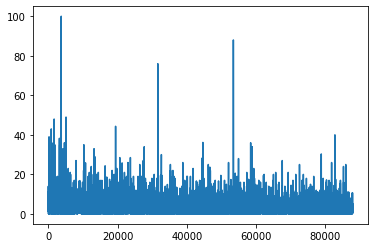

In [ ]:
plt.plot(data['solo_KillDeathRatio'])


(array([18753., 43036., 15484.,  5287.,  2142.,  1052.,   626.,   387.,
          276.,   290.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

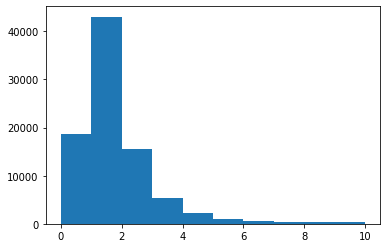

In [ ]:
plt.hist(data['solo_KillDeathRatio'],bins=[0,1,2,3,4,5,6,7,8,9,10])

Checking for any missing values in the data

In [ ]:
data.isnull().sum()

player_name            0
tracker_id             0
solo_KillDeathRatio    0
solo_WinRatio          0
solo_TimeSurvived      0
                      ..
squad_Heals            0
squad_Revives          0
squad_Boosts           0
squad_DamageDealt      0
squad_DBNOs            0
Length: 152, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7ff61cd0bf90>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff61cca67d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff61ccac810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff61ccac290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff61cca1d10>,
  <matplotlib.lines.Line2D at 0x7ff61cca6290>]}

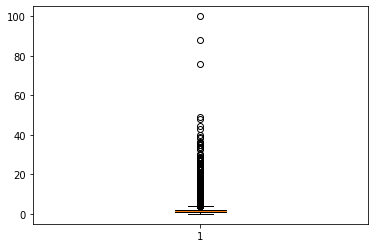

In [ ]:
plt.boxplot(data['solo_KillDeathRatio'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#X_train,X_test=train_test_split(data,test_size=0.2,random_state=42)
X_train=data

Importing the libraries for k-means clustering and for scaling the features

In [ ]:
# k means implementation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

A view over X_train data frame

In [ ]:
X_train

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,solo_BestRating,solo_DamagePg,solo_HeadshotKillsPg,solo_HealsPg,solo_KillsPg,solo_MoveDistancePg,solo_RevivesPg,solo_RoadKillsPg,solo_TeamKillsPg,solo_TimeSurvivedPg,solo_Top10sPg,solo_Kills,solo_Assists,solo_Suicides,solo_TeamKills,solo_HeadshotKills,solo_HeadshotKillRatio,solo_VehicleDestroys,solo_RoadKills,solo_DailyKills,solo_WeeklyKills,solo_RoundMostKills,solo_MaxKillStreaks,solo_WeaponAcquired,solo_Days,solo_LongestTimeSurvived,solo_MostSurvivalTime,solo_AvgSurvivalTime,...,squad_BestRating,squad_DamagePg,squad_HeadshotKillsPg,squad_HealsPg,squad_KillsPg,squad_MoveDistancePg,squad_RevivesPg,squad_RoadKillsPg,squad_TeamKillsPg,squad_TimeSurvivedPg,squad_Top10sPg,squad_Kills,squad_Assists,squad_Suicides,squad_TeamKills,squad_HeadshotKills,squad_HeadshotKillRatio,squad_VehicleDestroys,squad_RoadKills,squad_DailyKills,squad_WeeklyKills,squad_RoundMostKills,squad_MaxKillStreaks,squad_WeaponAcquired,squad_Days,squad_LongestTimeSurvived,squad_MostSurvivalTime,squad_AvgSurvivalTime,squad_WinPoints,squad_WalkDistance,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,1415.79,255.36,0.65,1.94,2.59,3321.28,0,0.00,0.00,1086.42,0.24,44,1,0,0,11,0.25,0,0,13,19,13,1,0,14,1909.66,1909.66,1262.83,...,3208.69,377.15,0.50,3.40,2.86,8091.57,0.36,0.04,0.00,1657.95,0.91,1836,892,1,3,319,0.17,56,24,34,274,11,5,0,46,2328.32,2328.32,1449.03,4868,1443195.59,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,1860.74,393.04,1.27,1.82,3.61,5021.41,0,0.06,0.00,1000.45,0.33,119,2,0,0,42,0.35,3,2,18,18,13,3,0,10,1987.94,1987.94,1221.32,...,3170.75,373.68,0.61,2.83,3.05,8381.97,0.38,0.03,0.00,1630.18,0.89,2201,964,1,3,439,0.20,44,22,84,405,14,5,0,44,2192.81,2192.81,1570.51,4058,1755866.37,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,1266.60,329.76,0.60,1.00,3.60,2804.80,0,0.00,0.00,866.09,0.20,18,1,0,0,3,0.17,0,0,1,18,10,1,0,4,1578.31,1578.31,1133.17,...,3179.38,399.70,0.59,2.41,3.20,7625.66,0.29,0.03,0.01,1591.65,0.89,2348,965,2,9,434,0.18,61,23,65,382,17,4,0,48,2328.32,2328.32,1223.28,5929,1654344.11,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,1765.13,751.95,0.50,1.00,7.00,5986.82,0,0.00,0.00,1677.73,0.75,56,3,0,0,4,0.07,0,0,8,48,14,2,0,5,1980.79,1980.79,1677.73,...,3098.77,368.85,0.37,2.47,2.76,7733.03,0.29,0.04,0.01,1583.73,0.87,1354,659,1,3,180,0.13,36,21,56,56,12,5,0,38,2192.31,2192.31,1583.73,2576,1057919.00,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,1616.58,637.48,1.50,2.00,7.00,6526.96,0,0.00,0.00,1640.17,0.83,42,0,0,0,9,0.21,0,0,15,29,13,3,0,2,1923.71,1923.71,1640.17,...,3092.78,384.69,0.62,2.99,3.05,7741.01,0.29,0.02,0.01,1608.96,0.87,1270,490,0,6,257,0.20,23,9,42,160,15,6,0,40,2328.32,2328.32,1608.96,2579,872965.40,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87893,SaikoMene,87710,1.05,0.00,48273.92,62,0,0.00,5,8.1,62,1353.23,1484.34,123.03,0.29,2.02,1.05,1859.70,0,0.00,0.02,778.61,0.08,65,7,1,1,18,0.28,0,0,1,2,6,2,0,19,1947.84,1947.84,785.41,...,1648.14,130.10,0.16,2.43,0.91,3775.38,0.



1.   We have removed the "player_name","tracker_id" coloumns from the X_train and the new data frame is named as X_remove.
2. We have scaled the features in X_remove data frame.
3. The players that are left over(0 to 3) after forming 4 membered teams are found out and are formed as a team.
4. left over players are removed first them we form the team players
5. left over r players  are found as follows: first r min distance players from  distance list.



In [ ]:
import random
#X_remove=X_train
#X_remove=X_remove.sample(n=60)

X_remove=X_train
trainnames=X_remove["player_name"]
traintracker=X_remove["tracker_id"]
X_remove=X_remove.drop(['player_name','tracker_id'],axis=1)
scaler=StandardScaler()
X_remove=scaler.fit_transform(X_remove)
X_remove=pd.DataFrame(X_remove,columns=X_train.columns[2:])
namevalues=trainnames.values                        # the values in "player_name" coloumn are stored in the list namevalues
trackervalues=traintracker.values                   # the values in "tracker_id" coloumn are stored in the list trackervalues

j=X_remove.values                                   # the values in the data frame "X_remove" are stored in a matrix "j"
k=np.sum(j,axis=0)                                  # k is a row vector containing the sum of the elements in each coloumn
mu=k/len(j)                                         # mu is a row vector used to represent the mean of the features of all the players
mi=0                                                #in mi we compute the mean of team players in remaining players team
mi1=0                                               #mi1,mi2,mi3 indexes of the remaining players to be found  
mi2=0
mi3=0
rem=len(j)-(len(j)//4)*4        
dist=[]                                             #distance of all the elements from the center of the dataset 
for  i in range (0,len(j)):                         #finding the distances                                
  dist.append(sum(np.square(mu-j[i])))
if(rem==1):                                         #if number of remaining players are 1
 mi1=dist.index(min(dist))                          # finding the min distance index and storing in mi and removing it from X_remove 
 mi=dist[mi1]
 X_remove=X_remove.drop(labels=[mi1],axis=0)
 s1=namevalues[mi1]                                 # finding the name of the player and storing in s1 and deleting it from namevalues
 np.delete(namevalues,[mi1])
elif(rem==2):                                        #if number of remaining players are 2
  mi=1000000007
  mi=min(dist)                                       #for player1 mi1  is min distance index from list distance and we remove that index from distance and X_remove
  mi1=dist.index(min(dist))
  dist.remove(min(dist))
  mi+=min(dist)
  mi2=dist.index(min(dist))                         #again for player2 mi2  is min distance index from list distance and we remove that index from distance 
  dist.remove(min(dist))
  mi=mi/2                                           #mi is mean of team players 
  X_remove=X_remove.drop(labels=[mi1,mi2],axis=0)     
  s1=namevalues[mi1]                                #s1,s2 are the names of the player1,player2          
  s2=namevalues[mi2]
  np.delete(namevalues,[mi1,mi2])
elif(rem==3):                                        #if number of remaining players are 3
  mi=1000000007
  mi=min(dist)
  mi1=dist.index(min(dist))                          #for player1 mi1  is min distance index from list distance and we remove that index from distance and X_remove
  dist.remove(min(dist))
  mi+=min(dist)
  mi2=dist.index(min(dist))                          #for player2 mi2  is min distance index from list distance and we remove that index from distance and X_remove
  dist.remove(min(dist))
  mi+=min(dist)
  mi3=dist.index(min(dist))                           #for player3 mi3  is min distance index from list distance and we remove that index from distance and X_remove
  dist.remove(min(dist))
  mi=mi/3                                              #mi is the mean of the players
  X_remove=X_remove.drop(labels=[mi1,mi2,mi3],axis=0)
  s1=namevalues[mi1]                                   #s1,s2,s3 are the names of the player1,player2,player3 
  s2=namevalues[mi2]
  s3=namevalues[mi3]
  np.delete(namevalues,[mi1,mi2,mi3])
j=X_remove.values

In [ ]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=3)
kmeans.fit(X_remove)
pred=kmeans.predict(X_remove)
pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
list(np.where(pred==0))

[array([    0,     1,     2, ..., 87883, 87886, 87894])]

In [ ]:
mu

array([ 5.17358018e-18, -1.29339505e-17,  4.65622216e-17, -6.98433325e-17,
       -2.58679009e-18, -1.81075306e-17, -3.10414811e-17,  1.42273455e-16,
       -2.32811108e-17,  4.19059995e-16,  1.39686665e-16,  1.34513085e-16,
       -7.88970978e-17, -9.82980235e-17, -5.94961721e-17, -8.01904928e-17,
        0.00000000e+00, -6.85499374e-17,  1.46315315e-17, -8.27772829e-16,
       -1.44860245e-16,  1.55207405e-17,  2.58679009e-17, -5.17358018e-17,
        1.94009257e-17, -2.06943207e-17, -4.80819608e-16, -1.03471604e-17,
        4.65622216e-17,  1.81075306e-17, -2.71612960e-17,  1.52620615e-16,
        4.52688266e-17,  0.00000000e+00,  5.17358018e-17, -3.88018514e-16,
       -3.88018514e-16, -4.65622216e-17, -5.17358018e-18,  1.96596047e-16,
        7.76037027e-18,  2.58679009e-17,  2.75493145e-16, -4.39754316e-17,
        4.39754316e-17,  1.81075306e-17,  0.00000000e+00,  1.03471604e-17,
       -4.65622216e-17,  0.00000000e+00, -6.72565424e-17,  2.84546910e-17,
       -5.69093820e-17,  

In [ ]:
CC=kmeans.cluster_centers_
CC

array([[ 8.25422195e-02,  1.11321140e-02, -3.34391520e-03,
         2.47181215e-03,  1.80757613e-01,  1.21360643e-01,
         5.45940157e-02, -3.18684430e-02, -3.91382580e-03,
         2.87928817e-01,  2.81164700e-01,  1.60897374e-01,
         9.43164933e-02,  6.54483032e-02,  1.40691197e-01,
        -4.67972820e-03,  0.00000000e+00,  4.23835292e-02,
         4.44460881e-02, -1.27776082e-01, -3.19447594e-02,
         1.51719847e-01,  7.96845496e-02,  7.18371978e-02,
         7.18584935e-02,  1.47971757e-01,  6.47186901e-02,
         1.19966303e-01,  4.99945138e-02,  2.32297144e-01,
         1.62512872e-01,  4.07952054e-01,  2.31007403e-01,
         0.00000000e+00,  2.51403448e-01,  2.05366776e-01,
         2.05366776e-01, -7.82696140e-02,  3.89500822e-01,
        -9.48605707e-03,  8.10098520e-03,  4.39669202e-04,
        -1.06171818e-01,  1.05118907e-01,  2.58135999e-01,
         1.92735627e-02,  0.00000000e+00,  8.01908251e-02,
         1.34666620e-01,  0.00000000e+00,  1.14803174e-0

In [ ]:
c_size={0:len(pred[pred==0]),1:len(pred[pred==1]), 2:len(pred[pred==2]), 3:len(pred[pred==3])}
c_size=dict(sorted(c_size.items(),key=lambda item: item[1]))
h=list(c_size.keys())
h

[3, 0, 2, 1]

In [ ]:
c_size

{0: 15487, 1: 46265, 2: 18061, 3: 8083}

In [ ]:
c={0:[],1:[],2:[],3:[]}
for i in range(0,X_remove.shape[0]):
  c[pred[i]].append(i)
c

{0: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  26,
  27,
  28,
  29,
  31,
  33,
  35,
  36,
  37,
  39,
  41,
  42,
  43,
  45,
  46,
  47,
  48,
  49,
  51,
  52,
  54,
  58,
  59,
  61,
  62,
  63,
  64,
  65,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  84,
  85,
  86,
  89,
  90,
  91,
  92,
  96,
  98,
  100,
  103,
  104,
  105,
  108,
  111,
  112,
  113,
  114,
  115,
  116,
  118,
  124,
  126,
  127,
  129,
  130,
  133,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  147,
  148,
  149,
  152,
  153,
  158,
  159,
  160,
  161,
  165,
  167,
  168,
  170,
  172,
  174,
  175,
  176,
  177,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  188,
  189,
  190,
  192,
  193,
  196,
  198,
  199,
  200,
  201,
  204,
  205,
  206,
  207,
  208,
  211,
  214,
  215,
  216,
  217,
  219,
  220,
  221,
  222,
  223,
  224,
  227,
  228,
  232,
  234,
  236,

# Main Algorithm
1. CC[i] contains the ith cluster centroid
2. excess list contains the excess element's indices from all the execcively clustered clusters
3. c_size[i] contains the size of the ith cluster
4. c[i] is a list containing the indices of the elements that are in the ith cluster.
5. cost_function contains the average of the distances from each element to it's respective cluster centroid.
6. J contains the average of the distances from each team to the main centroid



In [ ]:
CC=kmeans.cluster_centers_
excess=[]
c_size={0:len(pred[pred==0]),1:len(pred[pred==1]), 2:len(pred[pred==2]), 3:len(pred[pred==3])}
# the cluster indices are sorted based on their sizes and the sorted form of indices are stored in the list h
c_size=dict(sorted(c_size.items(),key=lambda item: item[1]))
h=list(c_size.keys())
for e in range(0,4):                                                            # using for loop we would traverse each cluster(first bigger clusters, then smaller clusters)
  if(len(c[h[3-e]]) > X_remove.shape[0]//4):                                      # if the choosen cluster is a bigger cluster than the required one then:
    Diction1={}                                                                     # create a empty dictionary Diction1
    for t in range (0,len(c[h[3-e]])):                                              # using for loop, traverse through each element in the cluster and
      Diction1[c[h[3-e]][t]]=sum(np.square(CC[h[3-e]]-j[c[h[3-e]][t]]))               # find the distance of the element from it's respective cluster centroid and store it in Diction1 with key as it's index
    Diction1=dict(sorted(Diction1.items(),key=lambda item: item[1]))                # Now sort the Diction1 based on the values of the dictionary
    q1=list(Diction1.keys())                                                        # Now store the element's indices in the list q1
    c[h[3-e]].clear()                                                               # clear the elements in the cluster and then
    for t in range (0,X_remove.shape[0]//4):                                        # using for loop, append the first nearest "X_remove.shape[0]//4" elements to the cluster 
      c[h[3-e]].append(q1[t])
    for t in range (X_remove.shape[0]//4,c_size[h[3-e]]):                           # and store the remaining element's indices in the list "excess"
      excess.append(q1[t])
  elif(len(c[h[3-e]]) < X_remove.shape[0]//4):                                    # else if the choosen cluster is a smaller cluster than the required one then:
    want=X_remove.shape[0]//4 - len(c[h[3-e]])                                      # want contains the no.of excess elements needed for the cluster
    Diction2={}                                                                     # create a empty dictionary Diction2
    for t in range(0,len(excess)):                                                  # using for loop, traverse through each element in the "excess" list and
      Diction2[excess[t]]=sum(np.square(CC[h[3-e]]-j[excess[t]]))                     # store the distance of the element from the cluster centroid in the Diction2 with key as it's index 
    Diction2=dict(sorted(Diction2.items(),key=lambda item: item[1]))                # Now sort the Diction2 based on the values of the dictionay
    q2=list(Diction2.keys())                                                        # Now store the element's indices in the list q2
    for t in range(0,want):                                                         # Now usng for loop:
      c[h[3-e]].append(q2[t])                                                         # append the first nearest "want" no.of elements from the "excess" list to the cluster
      excess.remove(q2[t]);                                                           # and delete the appended element's value from the "excess" list
for e in range (0,4):                                                             # Now traverse through each cluster and
  p=0
  for i in range (0,len(c[e])):                                                     # using for loop traverse through each element in the cluster
    p+=j[c[e][i]]                                                                     # add the features of all the elements in the cluster and store it in p
  CC[e]=p/len(c[e])                                                                 # and then update the cluster centroid as the mean of the elements in the cluster
error=0                                                                           # intialise the variable "error" to 0 
for e in range (0,4):                                                             # using for loop traverse through each cluster
  for h in range (0,len(c[e])):                                                     # using for loop traverse through each element in the respective cluster
    error+=sum(np.square(CC[e]-j[c[e][h]]))                                           # store the sum of the distances from each element to it's respective cluster centroid
cost_function=(1/X_remove.shape[0])*error                                         # store the average of these distances in the cost_function

no_of_teams=len(j)//4                                                             
avg=[0 for i in range (0,no_of_teams)]                                            # avg is a list contain the average of the features of each team
for t in range (0, no_of_teams):                                                  # using for loop, traverse through each team:
  sum1=j[c[0][no_of_teams-t-1]]                                                     
  for e in range (1,4):                                                             # for each team select one element from each cluster assign him to the cluster
    sum1+=j[c[e][no_of_teams-t-1]]
  avg[t]=sum1/4                                                                     # store the average of the features of the team players in the list "avg"
ans=0                                                                             # initialise the variable "ans" to 0
for t in range (0,no_of_teams):                                                   # using for loop, traverse through each team
  ans+=sum(np.square(mu-avg[t]))                                                    # and store the distance from each team's avg to main centroid "mu" in "ans"
ans+=mi                                                                           # add the previously computed team average to the "ans"
J=(1/(2*(no_of_teams+1)))*ans                                                     # store the average of all these distances in the variable "J"



In [ ]:
c

{0: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  26,
  27,
  28,
  29,
  31,
  33,
  35,
  36,
  37,
  39,
  41,
  42,
  43,
  45,
  46,
  47,
  48,
  49,
  51,
  52,
  54,
  58,
  59,
  61,
  62,
  63,
  64,
  65,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  84,
  85,
  86,
  89,
  90,
  91,
  92,
  96,
  98,
  100,
  103,
  104,
  105,
  108,
  111,
  112,
  113,
  114,
  115,
  116,
  118,
  124,
  126,
  127,
  129,
  130,
  133,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  147,
  148,
  149,
  152,
  153,
  158,
  159,
  160,
  161,
  165,
  167,
  168,
  170,
  172,
  174,
  175,
  176,
  177,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  188,
  189,
  190,
  192,
  193,
  196,
  198,
  199,
  200,
  201,
  204,
  205,
  206,
  207,
  208,
  211,
  214,
  215,
  216,
  217,
  219,
  220,
  221,
  222,
  223,
  224,
  227,
  228,
  232,
  234,
  236,

In [ ]:
cost_function

124.15308653672592

In [ ]:
J

16.734557657955833

In [ ]:
for e in range(0,4):
  Diction3={}
  for i in range (0,len(c[e])):
    Diction3[c[e][i]]=sum(np.square(CC[e]-j[c[e][i]]))
  Diction3=dict(sorted(Diction3.items(),key=lambda item: item[1]))
  c[e]=list(Diction3.keys())
c

{0: [36908,
  3639,
  5744,
  9947,
  29310,
  29277,
  43528,
  21641,
  17103,
  49732,
  10627,
  9862,
  4062,
  38003,
  9086,
  19941,
  33648,
  23449,
  20333,
  1929,
  10161,
  29700,
  5277,
  49966,
  21612,
  31313,
  8529,
  12873,
  24615,
  9444,
  24067,
  10005,
  64207,
  13504,
  31415,
  42142,
  25008,
  29791,
  11723,
  16215,
  30451,
  29111,
  32163,
  23337,
  24855,
  16758,
  16467,
  14740,
  32594,
  31600,
  9637,
  47589,
  33827,
  31459,
  16680,
  45749,
  14847,
  31729,
  15767,
  42992,
  58725,
  31203,
  22274,
  24990,
  33006,
  31715,
  30127,
  30792,
  25109,
  23233,
  3773,
  17036,
  42114,
  13676,
  49169,
  30779,
  14486,
  13813,
  41004,
  21235,
  70480,
  17814,
  6942,
  34876,
  9367,
  31947,
  16615,
  14607,
  27449,
  63630,
  25869,
  7961,
  30416,
  62213,
  14477,
  20908,
  77145,
  8474,
  25405,
  41072,
  27369,
  49884,
  72891,
  22233,
  6252,
  70519,
  46602,
  15221,
  22068,
  19965,
  38138,
  32171,
  1324

In [ ]:
print("Team.no\tPlayer 1\tPlayer 2\tPlayer 3\tPlayer 4")
for t in range (1,no_of_teams+1):
  print(t,"\t",namevalues[c[0][no_of_teams-t]],"\t",namevalues[c[1][no_of_teams-t]],"\t",namevalues[c[2][no_of_teams-t]],"\t",namevalues[c[3][no_of_teams-t]])
if(rem==1):
  print(t+1,"\t",s1)
elif(rem==2):
  print(t+1,"\t",s1,"\t",s2)
elif(rem==3):
  print(t+1,"\t",s1,"\t",s2,"\t",s3)

Streaming output truncated to the last 5000 lines.
16976 	 RetardedPotato 	 Furshurr 	 jfbn 	 Sand_RING
16977 	 Doublejab 	 Felucca_ 	 JL026 	 SeraphApoc
16978 	 Cornholio5 	 Snooky12 	 Linesmile 	 yojin0713
16979 	 Giatso 	 firstchrono 	 ruc1d 	 snip97
16980 	 Dzarc 	 KoPerd 	 optimalsettings 	 the_nsixTv
16981 	 McLeanCuisine 	 deagleh4x 	 Kali-Zoidberg 	 CostelloNicho
16982 	 udamad 	 DaBlokz 	 paradiss 	 nereaalais23
16983 	 Fasolek 	 MasonDixon 	 Warox 	 TriggerPLZ
16984 	 bielsv321 	 psionicmatrix 	 Bunnicula 	 Hype65
16985 	 Saeding 	 pauw 	 Leh-bit 	 Hireon
16986 	 sigsauer 	 Tascha 	 Foxyy_ 	 WobbleKun
16987 	 I-active-I 	 Imaqtkbz 	 ReMarker 	 Vento77
16988 	 v0lt3x 	 R0kka 	 Artupic 	 Machomann
16989 	 SakuraEzra 	 jotdae 	 mon0_tv 	 LoLTrueNoob
16990 	 wadexD 	 Alberion 	 Kota 	 goob314
16991 	 Kiiiviii 	 Ecliptic_Dawn 	 eLarsen 	 zaksal
16992 	 rubedoe 	 Mihanoid 	 LuPu 	 Renovatioo
16993 	 DAEYEON 	 Soupdik 	 fR3eS 	 NerfThisNerd
16994 	 GreasySavage 	 Itako 	 Sebmeister 